In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import pygmt
import numpy as np
import datetime as dt

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy_geopd/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
df_ctd=pd.read_csv('/fs/site5/eccc/crd/ccrn/users/rpg002/stat_downscaling-workshop/data/lineP_ctds/lineP_CTD_training.csv',skiprows=24)
df_ctd['Sta']=[int(el[1:]) for el in df_ctd.STATION_ID.values[:]]
df_ctd['tdt']=[dt.datetime.strptime(el,'%Y-%m-%d %H:%M:%S') for el in df_ctd.TIME]
df_ctd['YM']=[f"{el.year}{el.month:02}" for el in df_ctd['tdt']]
df_ctd['hasT']=[1 if el>0 else 0 for el in df_ctd['TEMPERATURE']]
df_ctd

,STATION_ID,TIME,LATITUDE,LONGITUDE,DEPTH,PRESSURE,PRESSURE_BIN_CNTR,TEMPERATURE,SALINITY,OXYGEN_MMOL_M3,OXYGEN_UMOL_KG,Sta,tdt,YM,hasT
0,P26,1969-08-26 22:18:00,50.000000,-145.00000,0.000000,0.000000,0.5,12.3000,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
1,P26,1969-08-26 22:18:00,50.000000,-145.00000,5.000000,5.043289,5.5,12.1500,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
2,P26,1969-08-26 22:18:00,50.000000,-145.00000,10.000000,10.086701,10.5,12.1200,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
3,P26,1969-08-26 22:18:00,50.000000,-145.00000,32.000000,32.279182,32.5,8.5000,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
4,P26,1969-08-26 22:18:00,50.000000,-145.00000,35.000000,35.305614,35.5,7.8000,32.5400,NaN,NaN,26,1969-08-26 22:18:00,196908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233798,P17,2020-02-13 12:39:40,49.350166,-135.66684,1974.521684,2001.000000,2001.5,1.9819,34.5800,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233799,P17,2020-02-13 12:39:40,49.350166,-135.66684,1975.503826,2002.000000,2002.5,1.9802,34.5804,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233800,P17,2020-02-13 12:39:40,49.350166,-135.66684,1976.485963,2003.000000,2003.5,1.9801,34.5804,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233801,P17,2020-02-13 12:39:40,49.350166,-135.66684,1977.468096,2004.000000,2004.5,1.9800,34.5805,53.52,52.0,17,2020-02-13 12:39:40,202002,1


In [3]:
dfctd1=df_ctd.loc[df_ctd.hasT>0,['Sta','YM','LONGITUDE','LATITUDE']].groupby(['Sta','YM']).mean().reset_index().groupby('Sta').agg(
    N=pd.NamedAgg(column="YM", aggfunc="count"),
    lat=pd.NamedAgg(column="LATITUDE", aggfunc="mean"),
    lon=pd.NamedAgg(column="LONGITUDE", aggfunc="mean"))

In [4]:
dfctd1

,N,lat,lon
Sta,,,
4,128,48.649902,-126.666532
5,101,48.691993,-127.166304
6,124,48.743247,-127.666420
7,109,48.776601,-128.166435
8,119,48.816668,-128.666679
9,113,48.856554,-129.166098
10,116,48.893238,-129.666533
11,109,48.933311,-130.166603
12,115,48.969913,-130.666538


In [5]:
#points1 = pygmt.project(center=[-126.67,48.65], endpoint=[-145,50], generate=.33) #true station end points
points1 = pygmt.project(center=[-144.9,50], endpoint=[-126.6,48.65], generate=.333)

In [6]:
npoints=38*5
lats=np.linspace(50,48.65,npoints)
lons=np.linspace(-145,-126.7,npoints)
print(lats)

[50.         49.99285714 49.98571429 49.97857143 49.97142857 49.96428571
 49.95714286 49.95       49.94285714 49.93571429 49.92857143 49.92142857
 49.91428571 49.90714286 49.9        49.89285714 49.88571429 49.87857143
 49.87142857 49.86428571 49.85714286 49.85       49.84285714 49.83571429
 49.82857143 49.82142857 49.81428571 49.80714286 49.8        49.79285714
 49.78571429 49.77857143 49.77142857 49.76428571 49.75714286 49.75
 49.74285714 49.73571429 49.72857143 49.72142857 49.71428571 49.70714286
 49.7        49.69285714 49.68571429 49.67857143 49.67142857 49.66428571
 49.65714286 49.65       49.64285714 49.63571429 49.62857143 49.62142857
 49.61428571 49.60714286 49.6        49.59285714 49.58571429 49.57857143
 49.57142857 49.56428571 49.55714286 49.55       49.54285714 49.53571429
 49.52857143 49.52142857 49.51428571 49.50714286 49.5        49.49285714
 49.48571429 49.47857143 49.47142857 49.46428571 49.45714286 49.45
 49.44285714 49.43571429 49.42857143 49.42142857 49.41428571 49

Text(0.5, 1.0, 'Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')

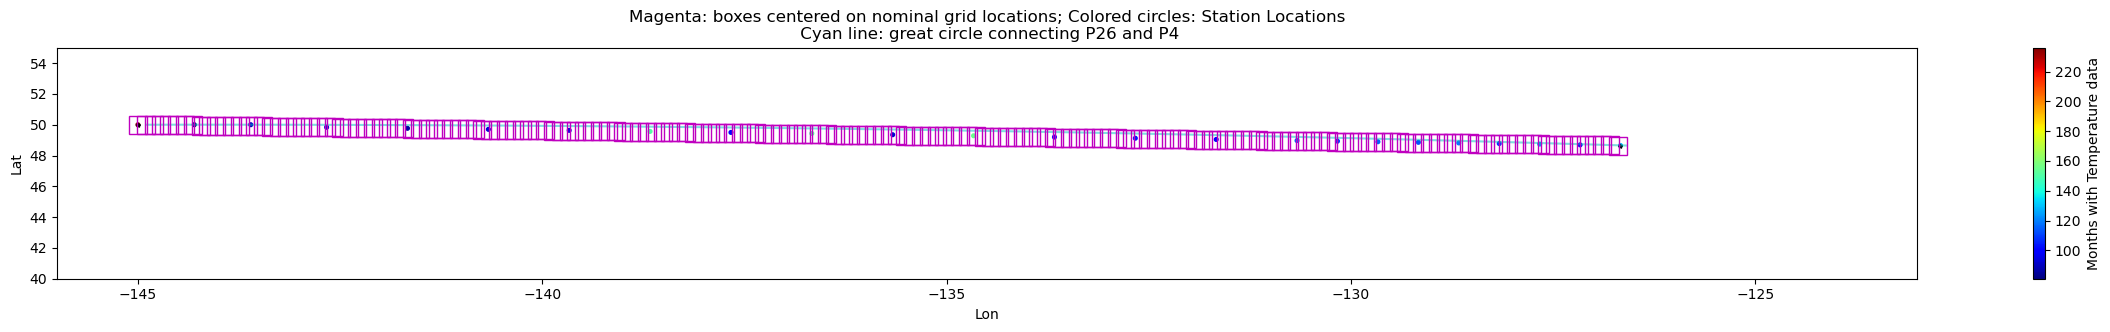

In [7]:
fig,ax=plt.subplots(1,1,figsize=(30,3))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-146,-123)
ax.set_ylim(40,55)
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
#fig.savefig('gridbasis.png',bbox_inches='tight',dpi=100)

In [8]:
np.diff(lons)

array([0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254, 0.0968254,
       0.0968254, 0.0968254, 0.0968254, 0.0968254, 

In [9]:
#dx=.5*np.cosd(50) %.5 degrees lon in km/111
#dxlatdeg=.5*np.cosd(50)
dylat=np.diff(lons)[0]*np.cos(np.pi*50/180)

In [10]:
lats[0]

np.float64(50.0)

[np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(35)]


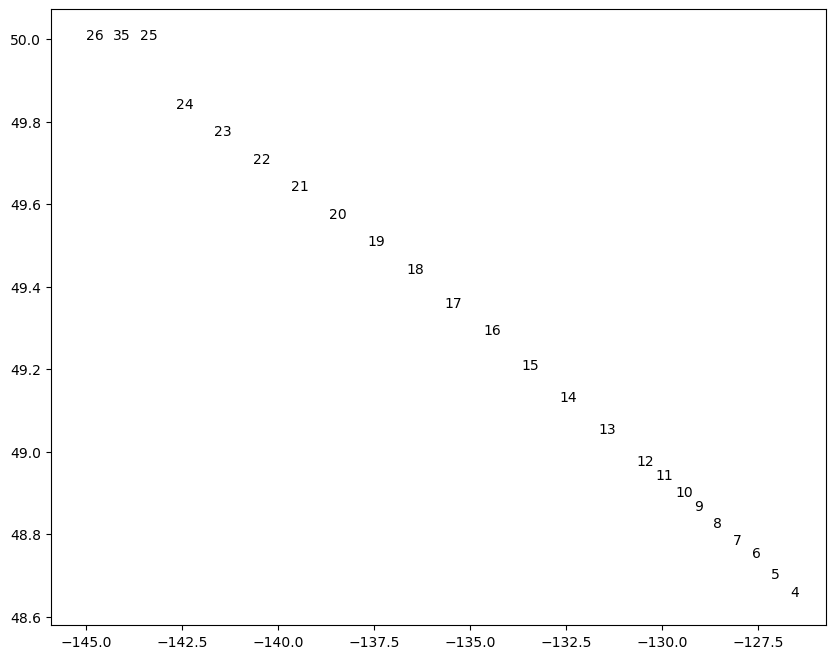

In [11]:
stations=df_ctd.Sta.unique()
print(sorted(stations))
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(df_ctd.LONGITUDE,df_ctd.LATITUDE,'w.',alpha=.2)
for ist in stations:
    lo,la=df_ctd.loc[df_ctd.Sta==ist,['LONGITUDE','LATITUDE']].values[0,:]
    ax.annotate(f"{ist}",xy=[lo,la],xycoords='data')

In [11]:
glon=np.expand_dims(lons,axis=0)
glat=np.expand_dims(lats,axis=0)
lonedges_lo=np.empty(npoints)
lonedges_hi=np.empty(npoints)
lonedges_lo[0]=lons[0]-(lons[1]-lons[0])/2
lonedges_lo[1:]=(lons[:-1]+lons[1:])/2
lonedges_hi[:-1]=(lons[:-1]+lons[1:])/2
lonedges_hi[-1]=lons[-1]+(lons[-1]-lons[-2])/2
latedges_lo=lats-dylat
latedges_hi=lats+dylat

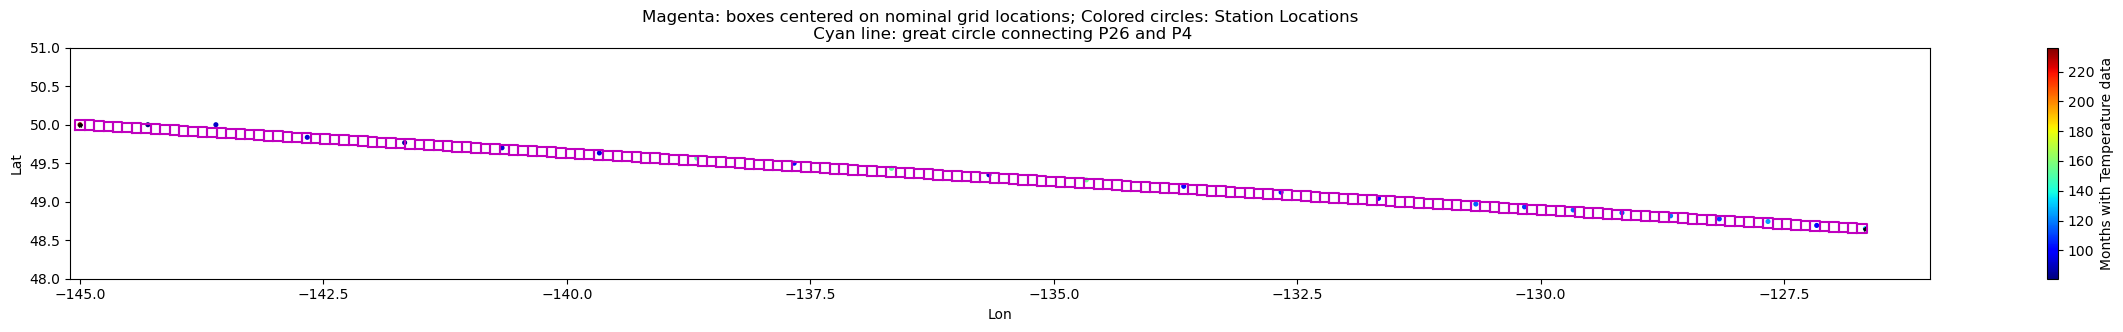

In [19]:
fig,ax=plt.subplots(1,1,figsize=(30,3))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
#ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
for ii in range(0,npoints):
    ax.plot([lonedges_lo[ii],lonedges_lo[ii],lonedges_hi[ii],lonedges_hi[ii],lonedges_lo[ii]],
            [latedges_lo[ii],latedges_hi[ii],latedges_hi[ii],latedges_lo[ii],latedges_lo[ii]],'m-')
#ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-145.1,-126)
ax.set_ylim(48,51)
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
fig.savefig('gridbasisHiRes.png',bbox_inches='tight',dpi=100)

In [20]:
lats

array([50.        , 49.99285714, 49.98571429, 49.97857143, 49.97142857,
       49.96428571, 49.95714286, 49.95      , 49.94285714, 49.93571429,
       49.92857143, 49.92142857, 49.91428571, 49.90714286, 49.9       ,
       49.89285714, 49.88571429, 49.87857143, 49.87142857, 49.86428571,
       49.85714286, 49.85      , 49.84285714, 49.83571429, 49.82857143,
       49.82142857, 49.81428571, 49.80714286, 49.8       , 49.79285714,
       49.78571429, 49.77857143, 49.77142857, 49.76428571, 49.75714286,
       49.75      , 49.74285714, 49.73571429, 49.72857143, 49.72142857,
       49.71428571, 49.70714286, 49.7       , 49.69285714, 49.68571429,
       49.67857143, 49.67142857, 49.66428571, 49.65714286, 49.65      ,
       49.64285714, 49.63571429, 49.62857143, 49.62142857, 49.61428571,
       49.60714286, 49.6       , 49.59285714, 49.58571429, 49.57857143,
       49.57142857, 49.56428571, 49.55714286, 49.55      , 49.54285714,
       49.53571429, 49.52857143, 49.52142857, 49.51428571, 49.50

In [21]:
def haversine(la0,lo0,la1,lo1):
    """ haversine formula with numpy array handling
    Calculates spherical distance between points on Earth in meters
    Compares elements of (la0,lo0) with (la1,lo1)
    Shapes must be compatible with numpy array broadcasting
    args: lats and lons in decimal degrees
    returns: distance on sphere with volumetric mean Earth radius in meters
    """
    rEarth=6371*1e3 # 
    # convert to radians
    la0=np.radians(la0)
    la1=np.radians(la1)
    lo0=np.radians(lo0)
    lo1=np.radians(lo1)
    theta=2*np.arcsin(np.sqrt(np.sin((la0-la1)/2)**2+np.cos(la0)*np.cos(la1)*np.sin((lo0-lo1)/2)**2))
    d=rEarth*theta
    return d

In [23]:
gridSpecs=pd.DataFrame(data=np.concatenate((glon,glat),axis=0).transpose(),columns=['nom_lon','nom_lat'],index=np.arange(0,npoints))
gridSpecs

,nom_lon,nom_lat
0,-145.000000,50.000000
1,-144.903175,49.992857
2,-144.806349,49.985714
3,-144.709524,49.978571
4,-144.612698,49.971429
...,...,...
185,-127.087302,48.678571
186,-126.990476,48.671429
187,-126.893651,48.664286
188,-126.796825,48.657143


In [24]:
gridSpecs['lonedges_lo']=lonedges_lo
gridSpecs['lonedges_hi']=lonedges_hi
gridSpecs['latedges_lo']=latedges_lo
gridSpecs['latedges_hi']=latedges_hi
gridSpecs['Sta']=None
gridSpecs['StaLon']=None
gridSpecs['StaLat']=None

In [38]:
lo=-129
la=48.8
dist=np.array([haversine(la,lo,la2,lo2) for la2, lo2 in zip(gridSpecs['nom_lat'],gridSpecs['nom_lon'])])
ix=np.argmin(dist)
ix

np.int64(165)

In [40]:
def getgridind(lo,la):
    dist=np.array([haversine(la,lo,la2,lo2) for la2, lo2 in zip(gridSpecs['nom_lat'],gridSpecs['nom_lon'])])
    ix=np.argmin(dist)
    return ix

for sta, irow in dfctd1.iterrows():
    gridind=getgridind(irow['lon'],irow['lat'])
    print(sta,gridind)
    if gridind>=0: 
        gridSpecs.at[gridind,'Sta']=sta
        gridSpecs.at[gridind,'StaLon']=irow['lon']
        gridSpecs.at[gridind,'StaLat']=irow['lat']
    else:
        print('Error:',sta,lat,lon,gridind)

4 189
5 184
6 179
7 174
8 169
9 163
10 158
11 153
12 148
13 138
14 127
15 117
16 107
17 96
18 86
19 76
20 65
21 55
22 45
23 34
24 24
25 14
26 0
35 7


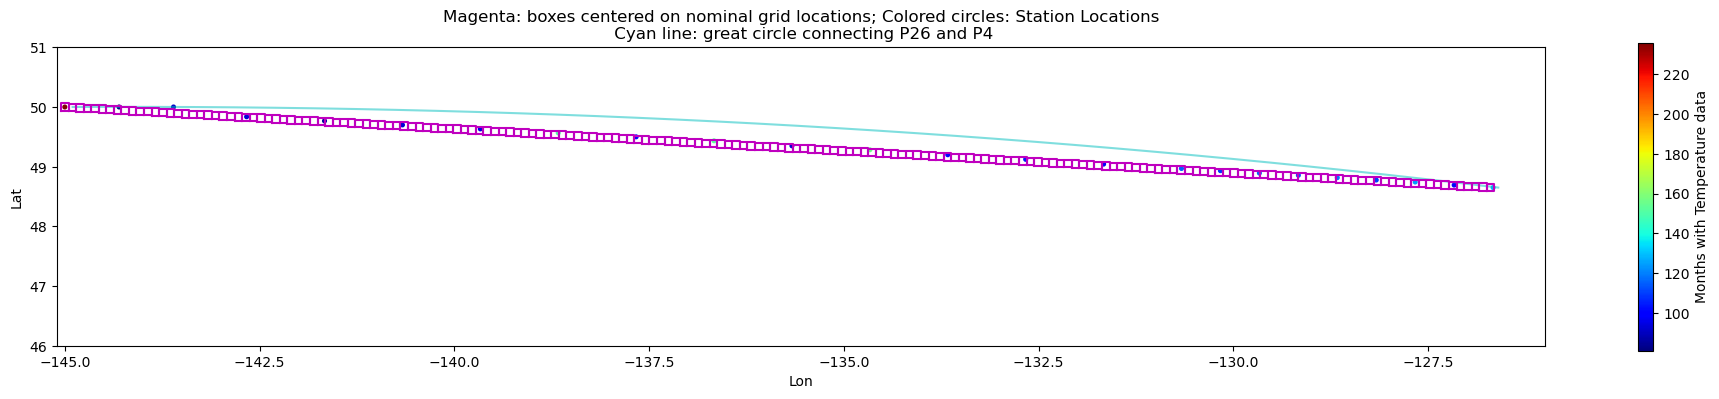

In [41]:
fig,ax=plt.subplots(1,1,figsize=(24,4))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
#ax.plot(-145,50,'k*',ms=3)
#ax.plot(-126.67,48.65,'k*',ms=3)
ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
for ii in range(0,npoints):
    ax.plot([gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_lo[ii]],
            [gridSpecs.latedges_lo[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_lo[ii],gridSpecs.latedges_lo[ii]],'m-')
#ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-145.1,-126)
ax.set_ylim(46,51)
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
ax.set_aspect(np.sin(50*np.pi/180))
fig.savefig('gridoutHiRes.png',bbox_inches='tight',dpi=100)

In [42]:
gridSpecs

,nom_lon,nom_lat,lonedges_lo,lonedges_hi,latedges_lo,latedges_hi,Sta,StaLon,StaLat
0,-145.000000,50.000000,-145.048413,-144.951587,49.937762,50.062238,26,-144.999964,50.000064
1,-144.903175,49.992857,-144.951587,-144.854762,49.930619,50.055095,None,None,None
2,-144.806349,49.985714,-144.854762,-144.757937,49.923476,50.047952,None,None,None
3,-144.709524,49.978571,-144.757937,-144.661111,49.916333,50.040810,None,None,None
4,-144.612698,49.971429,-144.661111,-144.564286,49.909190,50.033667,None,None,None
...,...,...,...,...,...,...,...,...,...
185,-127.087302,48.678571,-127.135714,-127.038889,48.616333,48.740810,None,None,None
186,-126.990476,48.671429,-127.038889,-126.942063,48.609190,48.733667,None,None,None
187,-126.893651,48.664286,-126.942063,-126.845238,48.602048,48.726524,None,None,None
188,-126.796825,48.657143,-126.845238,-126.748413,48.594905,48.719381,None,None,None


In [43]:
gridSpecs['Index']=gridSpecs.index

In [44]:
gridSpecs.to_csv('gridspecsHiRes.csv')

In [45]:
gridSpecs

,nom_lon,nom_lat,lonedges_lo,lonedges_hi,latedges_lo,latedges_hi,Sta,StaLon,StaLat,Index
0,-145.000000,50.000000,-145.048413,-144.951587,49.937762,50.062238,26,-144.999964,50.000064,0
1,-144.903175,49.992857,-144.951587,-144.854762,49.930619,50.055095,None,None,None,1
2,-144.806349,49.985714,-144.854762,-144.757937,49.923476,50.047952,None,None,None,2
3,-144.709524,49.978571,-144.757937,-144.661111,49.916333,50.040810,None,None,None,3
4,-144.612698,49.971429,-144.661111,-144.564286,49.909190,50.033667,None,None,None,4
...,...,...,...,...,...,...,...,...,...,...
185,-127.087302,48.678571,-127.135714,-127.038889,48.616333,48.740810,None,None,None,185
186,-126.990476,48.671429,-127.038889,-126.942063,48.609190,48.733667,None,None,None,186
187,-126.893651,48.664286,-126.942063,-126.845238,48.602048,48.726524,None,None,None,187
188,-126.796825,48.657143,-126.845238,-126.748413,48.594905,48.719381,None,None,None,188


In [46]:
import numpy as np
.5*111*np.cos(50)

np.float64(53.55561458131229)